In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.

# Função para normalizar todas as colunas de um dataframe pelo método de valor mínimo 0 e máximo 1
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado


In [47]:
#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0
#df_remove=df_chem.loc[(df_chem["Mohs Hardness"] == 0.000)]

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)


     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 2000

i = df_chem.index
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed)

df_treino = df_chem.loc[i_treino]
df_teste = df_chem.loc[i_teste]

#print(df_treino)
#print()
#print(df_teste)

In [49]:
#Definição dos parâmetros
tamanho_rf = 0.1
seed_rf = 1024
nome = 'df_chem'
atributos = ["Mohs Hardness","Specific Gravity", 'Molar Mass', 'Molar Volume', 'Calculated Density']
#atributos = ["Mohs Hardness", "Refractive Index", "Dispersion", 'Specific Gravity']
target = ["Refractive Index"]

i = df_chem.index
i_treino, i_teste = train_test_split(i, test_size=tamanho_rf, random_state = seed_rf)

df_treino = df_chem.loc[i_treino]
df_teste = df_chem.loc[i_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(atributos, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(atributos, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

array([[<AxesSubplot:title={'center':'Refractive Index'}>]], dtype=object)

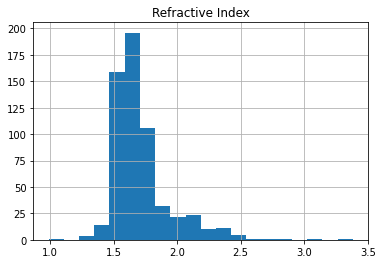

In [50]:
import seaborn as sns
import pandas as pd

TARGET =  ["Refractive Index"]
df_chem[TARGET].hist(bins=20)


array([[<AxesSubplot:title={'center':'Refractive Index'}>]], dtype=object)

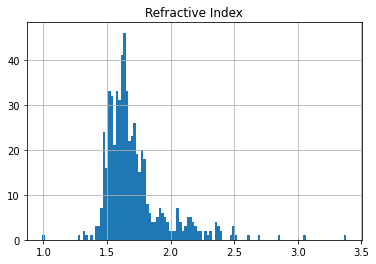

In [51]:
df_chem[TARGET].hist(bins=120)

In [52]:
#logic = df_chem["Refractive Index"] <= 0.0
#print(len(df_chem.loc[logic]),'índice de refração muito baixo')
logic = (df_chem["Refractive Index"] != 0.0) & (df_chem["Refractive Index"] <= 1.5)
print(len(df_chem.loc[logic]),'índice de Refração baixo')
logic = (df_chem["Refractive Index"] > 1.5) & (df_chem["Refractive Index"] <= 1.8)
print(len(df_chem.loc[logic]),'índice de Refração médio')
logic = (df_chem["Refractive Index"] > 1.8) & (df_chem["Refractive Index"] <= 2.1)
print(len(df_chem.loc[logic]),'índice de refração elevado')
logic = (df_chem["Refractive Index"] > 2.1)
print(len(df_chem.loc[logic]),'índice de refração muito elevado')

52 índice de Refração baixo
410 índice de Refração médio
78 índice de refração elevado
48 índice de refração muito elevado


In [53]:
df_chem['Refrativo Categórico'] = None

#logic = df_chem["Refractive Index"] <= 0.4
#df_chem.loc[logic, 'Refrativo Categórico'] = 'índice de refração muito baixo'
logic = (df_chem["Refractive Index"] > 0.4) & (df_chem["Refractive Index"] <= 1.5)
df_chem.loc[logic, 'Refrativo Categórico'] = 'índice de Refração baixo'
logic = (df_chem["Refractive Index"] > 1.5) & (df_chem["Refractive Index"] <= 1.8)
df_chem.loc[logic, 'Refrativo Categórico'] = 'índice de Refração médio'
logic = (df_chem["Refractive Index"] > 1.8) & (df_chem["Refractive Index"] <= 2.1)
df_chem.loc[logic, 'Refrativo Categórico'] = 'índice de refração elevado'
logic = (df_chem["Refractive Index"] > 2.1)
df_chem.loc[logic, 'Refrativo Categórico'] = 'índice de refração muito elevado'
print(df_chem)


     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density        Refrativo Categórico  
0        0.123390               5.498    índice de Refração médio  
1        0.056083      

In [56]:
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 1024
FEATURES = ["Mohs Hardness","Specific Gravity", 'Molar Mass', 'Molar Volume', 'Calculated Density']
TARGET = ["Refrativo Categórico"]

indices = df_chem.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df_chem.loc[indices_treino]
df_teste = df_chem.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

### Árvore de decisão

In [57]:
from sklearn.tree import DecisionTreeClassifier

NUM_FOLHAS = 40
NUM_PROFUNDIDADE = 10
#CRITERIO = 'absolute_error'
SPLITTER = "best"
MINIMO_SPLIT = 2
MINIMO_FOLHAS = 1
PESO_FOLHAS = 0.0
MAXIMO_FEATURES = None
IMPUREZA_MINIMO = 0.0
COMPLEXO_ALPHA = 0.0



modelo_dt = DecisionTreeClassifier(
        max_leaf_nodes=NUM_FOLHAS,
        max_depth=NUM_PROFUNDIDADE,
        #criterion=CRITERIO,
        splitter=SPLITTER,
        min_samples_split=MINIMO_SPLIT,
        min_samples_leaf=MINIMO_FOLHAS,
        min_weight_fraction_leaf=PESO_FOLHAS,
        max_features=MAXIMO_FEATURES,
        min_impurity_decrease=IMPUREZA_MINIMO,
        ccp_alpha=COMPLEXO_ALPHA,
        random_state=1024,
    )


# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
previsao_teste = modelo_dt.predict(X_treino)
print(previsao)

['índice de Refração médio' 'índice de Refração médio'
 'índice de refração muito elevado' 'índice de Refração baixo'
 'índice de Refração baixo' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de refração elevado'
 'índice de refração muito elevado' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de refração muito elevado'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de refração elevado' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração baixo' 'índice de refração muito elevado'
 'índice de Refração médio' 'índice de Refração baixo'
 'índice de Refração médio' '

In [58]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Accuracy: 0.7966101694915254


A RMSE do modelo de baseline foi de  "0.2560".
A Accuracy do modelo de classificação foi de "0.7966" 

In [59]:
from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=1024)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao)

['índice de Refração médio' 'índice de Refração médio'
 'índice de refração muito elevado' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de refração muito elevado'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração médio'
 'índice de Refração baixo' 'índice de Refração médio'
 'índice de Refração médio' 'índice de Refração baixo'
 'índice de Refração médio' 'índice de Refração m

In [60]:
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))


Accuracy: 0.8135593220338984


In [61]:
#print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste, previsao)

array([[ 2,  5,  0,  0],
       [ 1, 44,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0,  0,  2]], dtype=int64)

Parece-me que o modelo acertou a maior parte das previsões.